In [767]:
import pandas as pd
import numpy as np

In [768]:
mlb=pd.read_csv('./data/mlb_PA_2013to2018.csv')

In [769]:
mlb.head()

,Unnamed: 0,pitcher_name,batter_name,gameday_link,inning_side,inning,stand,p_throws,event,date,season,away_team,home_team,pitcher_team
0,84377,Johnny Cueto,Mike Trout,gid_2013_04_01_anamlb_cinmlb_1,top,1,R,R,Strikeout,2013-04-01,2013,ana,cin,cin
1,84381,Johnny Cueto,Erick Aybar,gid_2013_04_01_anamlb_cinmlb_1,top,1,L,R,Lineout,2013-04-01,2013,ana,cin,cin
2,84384,Johnny Cueto,Albert Pujols,gid_2013_04_01_anamlb_cinmlb_1,top,1,R,R,Groundout,2013-04-01,2013,ana,cin,cin
3,84387,Jered Weaver,Shin-Soo Choo,gid_2013_04_01_anamlb_cinmlb_1,bottom,1,L,R,Hit By Pitch,2013-04-01,2013,ana,cin,ana
4,84392,Jered Weaver,Brandon Phillips,gid_2013_04_01_anamlb_cinmlb_1,bottom,1,R,R,Strikeout,2013-04-01,2013,ana,cin,ana


In [770]:
mlb.shape

(1104502, 14)

In [771]:
mlb.columns

Index(['Unnamed: 0', 'pitcher_name', 'batter_name', 'gameday_link',
       'inning_side', 'inning', 'stand', 'p_throws', 'event', 'date', 'season',
       'away_team', 'home_team', 'pitcher_team'],
      dtype='object')

In [772]:
#Drop unnecessary columns
mlb_u=mlb.drop(columns=['Unnamed: 0', 'gameday_link'])

In [773]:
mlb_u.head(15)

,pitcher_name,batter_name,inning_side,inning,stand,p_throws,event,date,season,away_team,home_team,pitcher_team
0,Johnny Cueto,Mike Trout,top,1,R,R,Strikeout,2013-04-01,2013,ana,cin,cin
1,Johnny Cueto,Erick Aybar,top,1,L,R,Lineout,2013-04-01,2013,ana,cin,cin
2,Johnny Cueto,Albert Pujols,top,1,R,R,Groundout,2013-04-01,2013,ana,cin,cin
3,Jered Weaver,Shin-Soo Choo,bottom,1,L,R,Hit By Pitch,2013-04-01,2013,ana,cin,ana
4,Jered Weaver,Brandon Phillips,bottom,1,R,R,Strikeout,2013-04-01,2013,ana,cin,ana
5,Jered Weaver,Joey Votto,bottom,1,L,R,Flyout,2013-04-01,2013,ana,cin,ana
6,Jered Weaver,Ryan Ludwick,bottom,1,R,R,Walk,2013-04-01,2013,ana,cin,ana
7,Jered Weaver,Jay Bruce,bottom,1,L,R,Strikeout,2013-04-01,2013,ana,cin,ana
8,Johnny Cueto,Josh Hamilton,top,2,L,R,Lineout,2013-04-01,2013,ana,cin,cin
9,Johnny Cueto,Mark Trumbo,top,2,R,R,Strikeout,2013-04-01,2013,ana,cin,cin


In [774]:
#mlb_u['batter_team']=(mlb_u['pitcher_team']==mlb_u['home_team']).astype(int)
#mlb_u['batter_team'][0]
#for i in range(len(mlb_u['batter_team'])):
#    if mlb_u['batter_team'][i]==1:
#        mlb_u.loc[i,'batter_team']=mlb_u.loc[i,'away_team']
#    else:
#        mlb_u.loc[i,'batter_team']=mlb_u.loc[i,'home_team']
#mlb_u.head(3)

In [775]:
mlb_u.isnull().sum()

pitcher_name    15549
batter_name     14453
inning_side         0
inning              0
stand               0
p_throws            0
event               0
date                0
season              0
away_team           0
home_team           0
pitcher_team        0
dtype: int64

In [776]:
#Drop null values, model needs player names to attach stats
mlb_u=mlb_u.dropna()

In [777]:
mlb_u.shape

(1075060, 12)

In [778]:
mlb_u['event'].value_counts()

Strikeout               223263
Groundout               199256
Single                  160738
Flyout                  121983
Walk                     80517
Lineout                  62738
Pop Out                  50316
Double                   47749
Home Run                 29977
Forceout                 22171
Grounded Into DP         21449
Hit By Pitch              9773
Field Error               9225
Sac Fly                   7007
Sac Bunt                  6504
Intent Walk               5602
Triple                    4889
Double Play               2665
Runner Out                2272
Bunt Groundout            1990
Fielders Choice Out       1843
Bunt Pop Out               857
Strikeout - DP             812
Fielders Choice            564
Fan interference           255
Batter Interference        227
Catcher Interference       192
Sac Fly DP                 109
Bunt Lineout                85
Triple Play                 26
Sacrifice Bunt DP            6
Name: event, dtype: int64

In [779]:
#Use baseball knowledge to reformat events into 11 categories
mlb_u['event']=mlb_u['event'].map({
    'Strikeout':'K',
    'Groundout':'GB',
    'Single':'1B',
    'Flyout':'FB',
    'Walk':'BB',
    'Lineout':'LD',
    'Pop Out':'PU',
    'Double':'2B',
    'Home Run':'HR',
    'Forceout':'GB',
    'Grounded Into DP':'GB',
    'Hit By Pitch':'HBP',
    'Field Error':'Misc',
    'Sac Fly':'Misc',
    'Sac Bunt':'Misc',
    'Intent Walk':'BB',
    'Triple':'3B',
    'Double Play':'GB',
    'Runner Out':'Misc',
    'Bunt Groundout':'Misc',
    'Fielders Choice Out':'GB',
    'Bunt Pop Out':'Misc',
    'Strikeout - DP':'K',
    'Fielders Choice':'GB',
    'Fan interference':'HR',
    'Batter Interference':'K',
    'Catcher Interference':'1B',
    'Sac Fly DP':'FB',
    'Bunt Lineout':'Misc',
    'Triple Play':'Misc',
    'Sacrifice Bunt DP':'Misc'  
});

In [780]:
mlb_u[mlb_u['season']>=2016].shape

(528269, 12)

In [781]:
mlb_u['event'].value_counts()

GB      247948
K       224302
1B      160930
FB      122092
BB       86119
LD       62738
PU       50316
2B       47749
HR       30232
Misc     27972
HBP       9773
3B        4889
Name: event, dtype: int64

In [782]:
#read in player statistics data
FH=pd.read_csv('./data/CleanedPlayerData/MergedHitters.csv')
FP=pd.read_csv('./data/CleanedPlayerData/MergedPitchers.csv')

In [783]:
FH.shape,FP.shape,mlb_u.shape

((10833, 74), (5963, 79), (1075060, 12))

In [784]:
FH.head()

,hName,hTeam,hPA,hBB%,hK%,hBB/K,hAVG,hOBP,hSLG,hOPS,...,hfbld,hgb,hmax_distance,havg_distance,havg_hr_distance,hev95plus,hev95percent,hbarrels,hbrl_percent,hbrl_pa
0,David Hernandez,Diamondbacks,1.0,0.0%,0.0%,0.0,1.000,1.000,1.000,2.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aneury Rodriguez,Astros,1.0,0.0%,0.0%,0.0,1.000,1.000,1.000,2.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Shelby Miller,Cardinals,3.0,0.0%,0.0%,0.0,0.667,0.667,1.000,1.667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sean Burnett,Nationals,1.0,100.0%,0.0%,1.0,0.000,1.000,0.000,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dan Johnson,White Sox,31.0,29.0%,9.7%,3.0,0.364,0.548,0.818,1.367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [785]:
FP.head()

,pName,pTeam,pK/9,pBB/9,pK/BB,pHR/9,pK%,pBB%,pK-BB%,pAVG,...,pfbld,pgb,pmax_distance,pavg_distance,pavg_hr_distance,pev95plus,pev95percent,pbarrels,pbrl_percent,pbrl_pa
0,Tyson Brummett,Phillies,27.00,0.00,2.00,0.00,50.0%,0.0%,50.0%,0.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brad Mills,Angels,10.80,0.00,6.00,0.00,33.3%,0.0%,33.3%,0.167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Craig Kimbrel,Braves,16.66,2.01,8.29,0.43,50.2%,6.1%,44.2%,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Donnie Veal,White Sox,13.15,2.77,4.75,0.00,38.8%,8.2%,30.6%,0.111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Joe Martinez,Diamondbacks,9.00,0.00,1.00,0.00,20.0%,0.0%,20.0%,0.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [786]:
#Merge outcomes data with player stats
mlbx=pd.merge(mlb_u,FH,left_on=['batter_name','season'],right_on=['hName','hseason'],how='outer')

In [787]:
mlbx.shape
mlbx.isnull().sum().head(25)

pitcher_name     5730
batter_name      5730
inning_side      5730
inning           5730
stand            5730
p_throws         5730
event            5730
date             5730
season           5730
away_team        5730
home_team        5730
pitcher_team     5730
hName           94089
hTeam           96406
hPA             96406
hBB%            96406
hK%             96406
hBB/K           96406
hAVG            96406
hOBP            96406
hSLG            96406
hOPS            96406
hISO            96406
hSpd            96406
hBABIP          96406
dtype: int64

In [788]:
#do the same for pitchers
mlbx=pd.merge(mlbx,FP,left_on=['pitcher_name','season'],right_on=['pName','pseason'],how='outer')

In [789]:
#statcast data is only available from 2015 on, so eliminate outcomes from before 2015
mlbx.shape
mlbx=mlbx[mlbx['season']>=2015]
mlbx.shape

(714555, 165)

In [790]:
mlbx=mlbx.sort_values(by=['date','inning','inning_side'],ascending=[True,True,False])
mlbx.head()

,pitcher_name,batter_name,inning_side,inning,stand,p_throws,event,date,season,away_team,...,pfbld,pgb,pmax_distance,pavg_distance,pavg_hr_distance,pev95plus,pev95percent,pbarrels,pbrl_percent,pbrl_pa
369009,Jon Lester,Matt Carpenter,top,1.0,L,L,GB,2015-04-05,2015.0,sln,...,90.4,83.7,447.0,164.0,405.0,159.0,28.1,25.0,4.4,3.0
369026,Jon Lester,Jason Heyward,top,1.0,L,L,2B,2015-04-05,2015.0,sln,...,90.4,83.7,447.0,164.0,405.0,159.0,28.1,25.0,4.4,3.0
369042,Jon Lester,Matt Holliday,top,1.0,R,L,1B,2015-04-05,2015.0,sln,...,90.4,83.7,447.0,164.0,405.0,159.0,28.1,25.0,4.4,3.0
369049,Jon Lester,Jhonny Peralta,top,1.0,R,L,K,2015-04-05,2015.0,sln,...,90.4,83.7,447.0,164.0,405.0,159.0,28.1,25.0,4.4,3.0
369064,Jon Lester,Matthew Adams,top,1.0,L,L,K,2015-04-05,2015.0,sln,...,90.4,83.7,447.0,164.0,405.0,159.0,28.1,25.0,4.4,3.0


In [791]:
mlbx['away_team'].value_counts()

cle    24816
nya    24815
tba    24667
min    24327
pit    24255
oak    24252
tor    24242
cin    24149
kca    24131
bal    24104
det    23994
lan    23928
sea    23893
ari    23881
mil    23873
bos    23867
tex    23860
sfn    23859
chn    23826
phi    23630
nyn    23498
mia    23448
ana    23442
sln    23369
col    23312
was    23240
hou    23218
cha    22903
sdn    22844
atl    22595
aas      243
nas       74
Name: away_team, dtype: int64

In [792]:
#remove all star games from the data as they are not normal at bats
mlbx=mlbx[(mlbx['away_team']!='nas')&(mlbx['away_team']!='aas')]

In [793]:
mlbx.shape

(714238, 165)

In [794]:
mlbx['pseason'].value_counts()

2015.0    163912
2016.0    163431
2017.0    158545
2018.0    147087
Name: pseason, dtype: int64

In [795]:
#eliminate players whos season stats may be too small sample or irrelevant
mlbx=mlbx[(mlbx['hPA']>=20)&(mlbx['pIP']>=3)]

In [796]:
mlbx.shape

(556721, 165)

In [797]:
mlbx.head()

,pitcher_name,batter_name,inning_side,inning,stand,p_throws,event,date,season,away_team,...,pfbld,pgb,pmax_distance,pavg_distance,pavg_hr_distance,pev95plus,pev95percent,pbarrels,pbrl_percent,pbrl_pa
369009,Jon Lester,Matt Carpenter,top,1.0,L,L,GB,2015-04-05,2015.0,sln,...,90.4,83.7,447.0,164.0,405.0,159.0,28.1,25.0,4.4,3.0
369026,Jon Lester,Jason Heyward,top,1.0,L,L,2B,2015-04-05,2015.0,sln,...,90.4,83.7,447.0,164.0,405.0,159.0,28.1,25.0,4.4,3.0
369042,Jon Lester,Matt Holliday,top,1.0,R,L,1B,2015-04-05,2015.0,sln,...,90.4,83.7,447.0,164.0,405.0,159.0,28.1,25.0,4.4,3.0
369049,Jon Lester,Jhonny Peralta,top,1.0,R,L,K,2015-04-05,2015.0,sln,...,90.4,83.7,447.0,164.0,405.0,159.0,28.1,25.0,4.4,3.0
459267,Adam Wainwright,Dexter Fowler,bottom,1.0,L,R,2B,2015-04-05,2015.0,sln,...,89.1,81.4,386.0,147.0,NaN,23.0,26.4,3.0,3.4,2.7


In [798]:
#convert percentage columns into usable numbers
pctcols=[i for i in mlbx.columns if '%' in i]
for i in pctcols:
    mlbx[i]=mlbx[i].str.replace('%','').astype(float)/100
mlbx['hHR/FB']=mlbx['hHR/FB'].str.replace('%','').astype(float)/100
mlbx['pHR/FB']=mlbx['pHR/FB'].str.replace('%','').astype(float)/100

In [799]:
#remove events that happen because of runners on base, these will not be predictive
mlbx=mlbx[mlbx['event']!='Misc']

In [800]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout

In [801]:
FH.columns

Index(['hName', 'hTeam', 'hPA', 'hBB%', 'hK%', 'hBB/K', 'hAVG', 'hOBP', 'hSLG',
       'hOPS', 'hISO', 'hSpd', 'hBABIP', 'hUBR', 'hwGDP', 'hwSB', 'hwRC',
       'hwRAA', 'hwOBA', 'hwRC+', 'hplayerid', 'hGB/FB', 'hLD%', 'hGB%',
       'hFB%', 'hIFFB%', 'hHR/FB', 'hIFH', 'hIFH%', 'hBUH', 'hBUH%', 'hPull%',
       'hCent%', 'hOppo%', 'hSoft%', 'hMed%', 'hHard%', 'hG', 'hAB', 'hH',
       'h1B', 'h2B', 'h3B', 'hHR', 'hR', 'hRBI', 'hBB', 'hIBB', 'hSO', 'hHBP',
       'hSF', 'hSH', 'hGDP', 'hSB', 'hCS', 'hseason', 'hlast_name',
       'h first_name', 'hplayer_id', 'hattempts', 'havg_hit_angle',
       'hanglesweetspotpercent', 'hmax_hit_speed', 'havg_hit_speed', 'hfbld',
       'hgb', 'hmax_distance', 'havg_distance', 'havg_hr_distance',
       'hev95plus', 'hev95percent', 'hbarrels', 'hbrl_percent', 'hbrl_pa'],
      dtype='object')

In [802]:
FP.columns

Index(['pName', 'pTeam', 'pK/9', 'pBB/9', 'pK/BB', 'pHR/9', 'pK%', 'pBB%',
       'pK-BB%', 'pAVG', 'pWHIP', 'pBABIP', 'pLOB%', 'pERA-', 'pFIP-',
       'pxFIP-', 'pERA', 'pFIP', 'pE-F', 'pxFIP', 'pSIERA', 'pplayerid',
       'pGB/FB', 'pLD%', 'pGB%', 'pFB%', 'pIFFB%', 'pHR/FB', 'pRS', 'pRS/9',
       'pBalls', 'pStrikes', 'pPitches', 'pPull%', 'pCent%', 'pOppo%',
       'pSoft%', 'pMed%', 'pHard%', 'pW', 'pL', 'pG', 'pGS', 'pCG', 'pShO',
       'pSV', 'pHLD', 'pBS', 'pIP', 'pTBF', 'pH', 'pR', 'pER', 'pHR', 'pBB',
       'pIBB', 'pHBP', 'pWP', 'pBK', 'pSO', 'pseason', 'plast_name',
       'p first_name', 'pplayer_id', 'pattempts', 'pavg_hit_angle',
       'panglesweetspotpercent', 'pmax_hit_speed', 'pavg_hit_speed', 'pfbld',
       'pgb', 'pmax_distance', 'pavg_distance', 'pavg_hr_distance',
       'pev95plus', 'pev95percent', 'pbarrels', 'pbrl_percent', 'pbrl_pa'],
      dtype='object')

In [803]:
mlb_u.columns

Index(['pitcher_name', 'batter_name', 'inning_side', 'inning', 'stand',
       'p_throws', 'event', 'date', 'season', 'away_team', 'home_team',
       'pitcher_team'],
      dtype='object')

In [804]:
mlb_u['stand'].value_counts()
mlb_u['p_throws'].value_counts()

R    786076
L    288984
Name: p_throws, dtype: int64

In [805]:
#turn handedness into an integer variable, asking if b/p is right handed
mlbx['stand']=(mlbx['stand']=='R').astype(int)
mlbx['p_throws']=(mlbx['p_throws']=='R').astype(int)

In [806]:
mlbx['stand'].value_counts()
mlbx['p_throws'].value_counts()

1    396812
0    146174
Name: p_throws, dtype: int64

In [807]:
mlbx.dropna(axis='index',inplace=True)

In [808]:
mlbx.to_csv('./data/mlbxdb.csv',index=False)

In [809]:
#Drop columns that are duplicates or other statistics or give unnecessary data
dropcols=['pitcher_name','batter_name','inning_side','inning','event','date','away_team','home_team','pitcher_team',
          'hName','hTeam','hPA','hplayerid','hseason','hlast_name','h first_name','hplayer_id','hattempts','hG','hAB',
          'pName','pTeam','pplayerid','pIP','pTBF','pseason','plast_name','p first_name','pplayer_id','pattempts']
X=mlbx.drop(columns=dropcols)

In [810]:
import seaborn as sns

In [811]:
#Show which statistics are most correlated to each outcome to help select features
for i in mlbx['event'].unique():
    X['event']=(mlbx['event']==i).astype(int)
    print(f"{i} baseline: {X['event'].value_counts(normalize=True)}")
    print(f'Most predictive variables for {i}: ')
    print(X.drop(columns='event').corrwith(other=X['event']).sort_values(ascending=False)[0:10])
    print('------------------------------------------')

GB baseline: 0    0.76865
1    0.23135
Name: event, dtype: float64
Most predictive variables for GB: 
pGB%      0.106056
pGB/FB    0.099125
hGB%      0.091290
hGB/FB    0.083852
hMed%     0.047075
hSoft%    0.033255
hCent%    0.032888
hGDP      0.031787
h1B       0.028272
hOppo%    0.027808
dtype: float64
------------------------------------------
2B baseline: 0    0.953143
1    0.046857
Name: event, dtype: float64
Most predictive variables for 2B: 
h2B       0.037727
pAVG      0.034086
pERA      0.029839
pERA-     0.029421
pWHIP     0.027483
pBABIP    0.027029
pE-F      0.026066
hAVG      0.025933
hSLG      0.025718
hOPS      0.024524
dtype: float64
------------------------------------------
1B baseline: 0    0.848025
1    0.151975
Name: event, dtype: float64
Most predictive variables for 1B: 
hAVG      0.063793
pAVG      0.060824
pBABIP    0.058425
hBABIP    0.054763
h1B       0.053964
hGB/FB    0.045529
hGB%      0.041592
pWHIP     0.041564
hIFH      0.041044
hMed%     0.035600
dtyp

In [812]:
import matplotlib.pyplot as plt

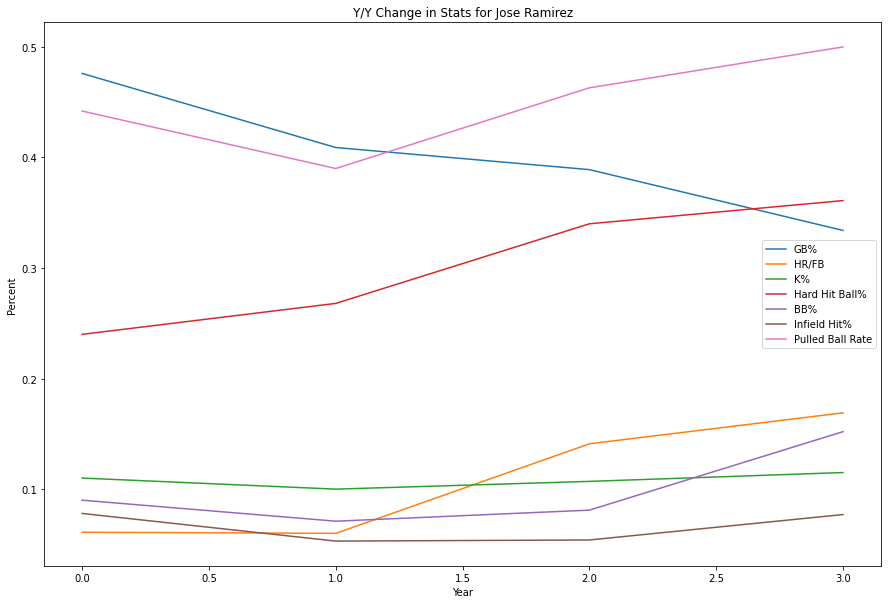

In [813]:
sea=[2015,2016,2017,2018,]
gb=[]
hrfb=[]
k=[]
hard=[]
bb=[]
ifh=[]
pull=[]
for i in sea:
    gb.append(mlbx['hGB%'][(mlbx['season']==i)&(mlbx['hName']=='Jose Ramirez')].mean())
    hrfb.append(mlbx['hHR/FB'][(mlbx['season']==i)&(mlbx['hName']=='Jose Ramirez')].mean())
    k.append(mlbx['hK%'][(mlbx['season']==i)&(mlbx['hName']=='Jose Ramirez')].mean())
    hard.append(mlbx['hHard%'][(mlbx['season']==i)&(mlbx['hName']=='Jose Ramirez')].mean())
    bb.append(mlbx['hBB%'][(mlbx['season']==i)&(mlbx['hName']=='Jose Ramirez')].mean())
    ifh.append(mlbx['hIFH%'][(mlbx['season']==i)&(mlbx['hName']=='Jose Ramirez')].mean())
    pull.append(mlbx['hPull%'][(mlbx['season']==i)&(mlbx['hName']=='Jose Ramirez')].mean())
plt.figure(figsize=(15,10))
plt.plot(gb,label='GB%'); 
plt.plot(hrfb,label='HR/FB');
plt.plot(k,label='K%'); 
plt.plot(hard,label='Hard Hit Ball%');
plt.plot(bb,label='BB%'); 
plt.plot(ifh,label='Infield Hit%');
plt.plot(pull,label='Pulled Ball Rate'); 
plt.ylabel('Percent');
plt.xlabel('Year');
plt.title('Y/Y Change in Stats for Jose Ramirez')
plt.legend();